Relatório VALE3

1. Introdução

Os principais fatores que influenciam o preço desse ativo são: 

- Preço do Minério de Ferro: A Vale é uma das maiores produtoras de minério de ferro do mundo, então o preço dessa commodity no mercado internacional impacta diretamente sua receita e lucratividade.
- Produção e Volume de Vendas: O volume de extração, produção e vendas de minério de ferro, níquel e cobre influencia a receita da empresa.
Qualquer problema operacional, como acidentes, greves ou falhas logísticas, pode afetar a produção e, consequentemente, o preço da ação.
- Dividendos e Política de Distribuição de Lucros: A Vale tem um histórico de pagamento de dividendos elevados, e mudanças na política de distribuição podem afetar a atratividade da ação.
Investidores institucionais olham os dividendos como um fator importante para decidir se continuam investindo na empresa.
- Cotação do Dólar (USD/BRL): A Vale vende minério de ferro em dólares, mas tem custos em reais.
Se o dólar sobe, a empresa pode lucrar mais com exportações, beneficiando o preço da ação.
Se o real se valoriza, a receita da empresa pode ser impactada negativamente.

Outros fatores isolados que podem influenciar o preço desse ativo são fatores naturais, como o rompimento de barragens (Mariana e Brumadinho), problemas de importações na China, taxas aduaneiras, etc.

Vale ressaltar que a Vale é uma das poucas empresas brasileiras que se beneficia com a alta do dólar, já que o minério de ferro é vendido em dólares internacionalmente. 

2. Análise
Primeiro, faz sentido tentar entender o cenário macro da Vale no ano de 2024. Como já foi mencionado na introdução, a ação dela é fortemente influenciada por fatores macroeconômicos. 

Análise de 2024:

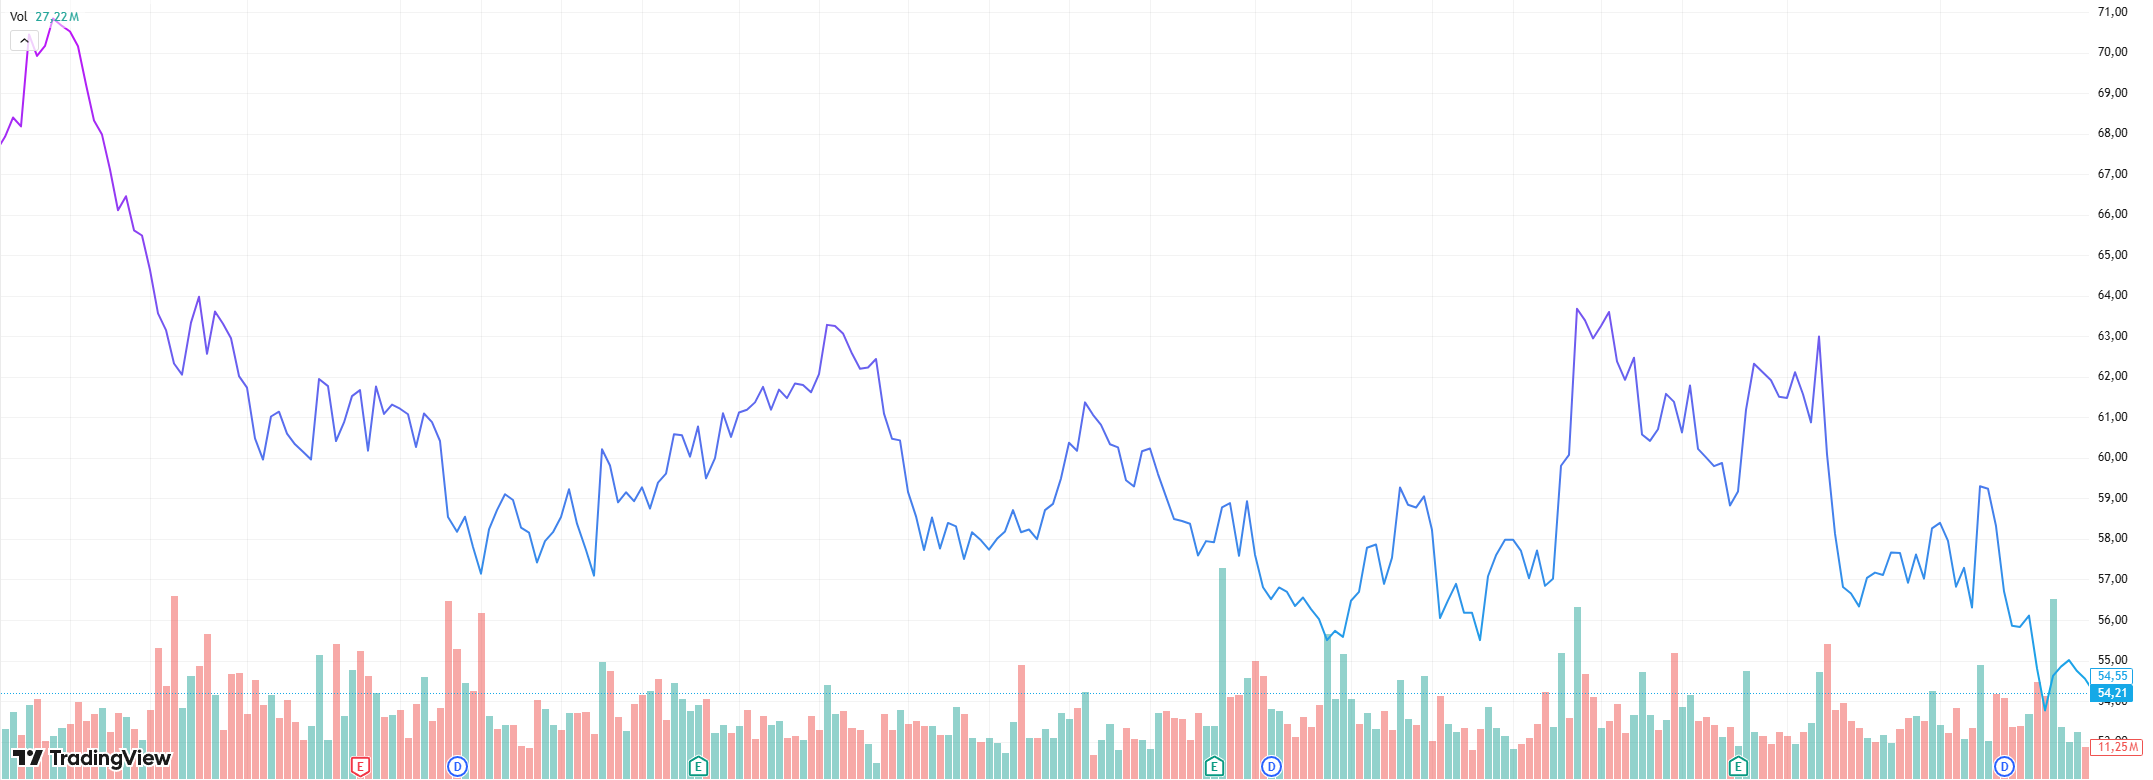

O gráfico acima (TradingView) nos mostra a variação das ações VALE3 no ano de 2024, com queda de 70,51 para 54,42 (-23,2%) por ação de 02/01/2024 até 30/12/2024. 
A queda das ações da VALE3 esse ano se deu principalmente devido a problemas com seu maior vendedor, a China (60% do total vendido), em um período onde a economia chinesa está enfraquecida devido a crises imobiliárias em seu mercado interno. Além disso, o preço no minério de ferro caiu 25% em 2024 e tende a cair mais levando em conta essa situação (Valor). 

Os resultados anuais da empresa foram batidos com margem de 2% se comparado ao ano de 2023, com valor total de 306,65 milhões de toneladas vendidas. 

Analisando o 4T24 da Vale em termos de resultado, vemos um volume de importação em queda se comparado ao mesmo período do ano passado, com 81,3 milhões de toneladas de ferro, queda de 4,6% se comparado ao mesmo período do ano passado (E-Investidor). Apesar disso, a meta anual de vendas foi batida. O resultado foi divulgado no dia 28/01/2025 e provocou uma queda no preço das ações VALE3 nesse dia, que abriram com alta de 53,50 reais por ação e fecharam com baixa de 52,63 em um período de 7h50 de mercado aberto (10h até 17h50). 

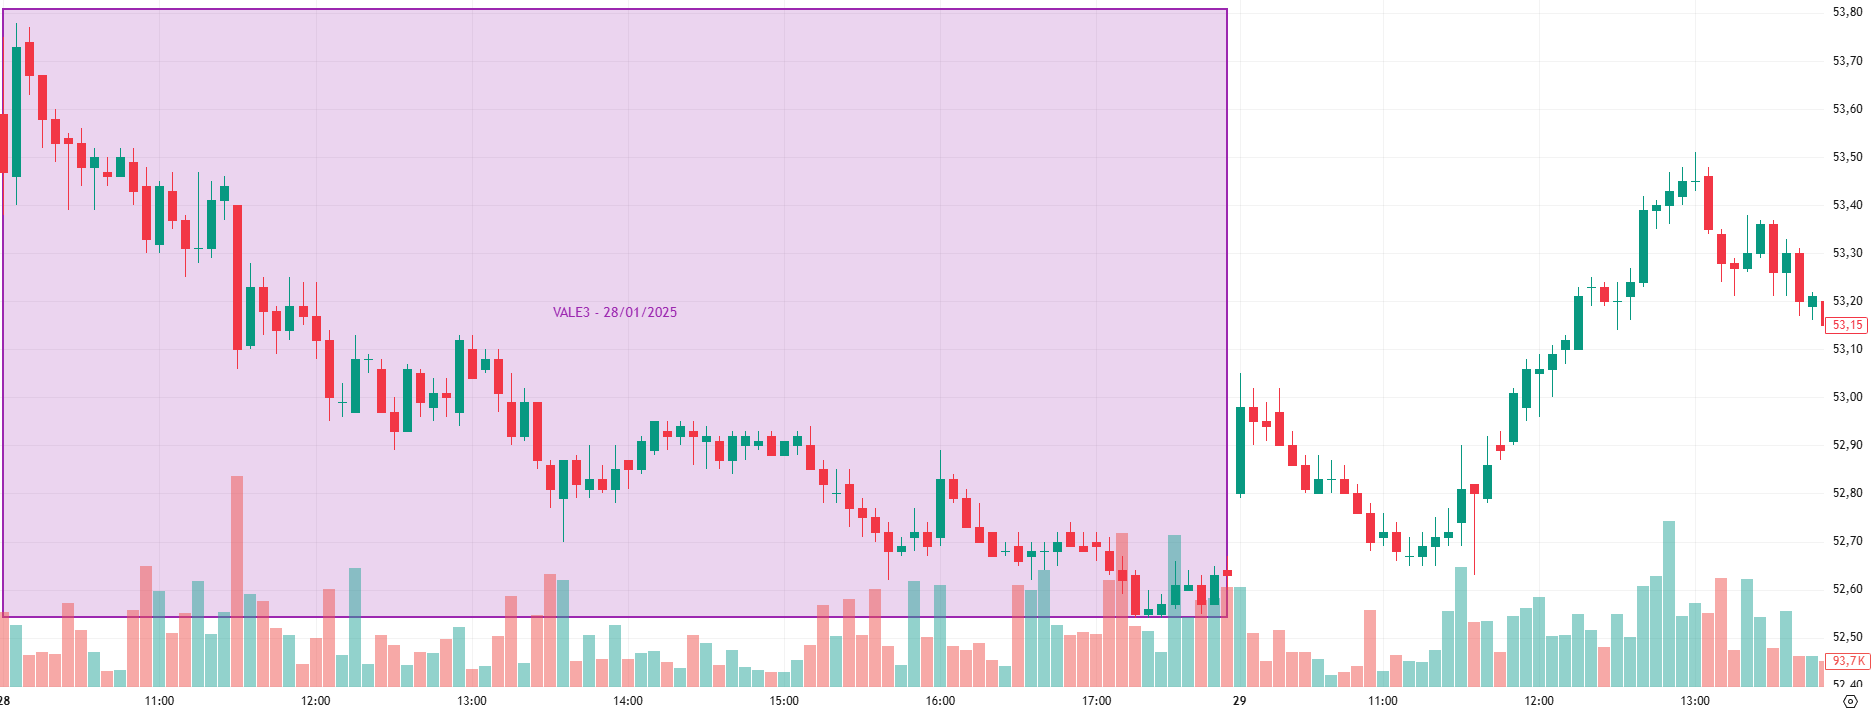

No presente momento, entende-se que a VALE3 é altamente influenciada por fatores externos, sendo recomendada uma posição *Neutra* em relação à compra de ativos. 
Também acredita-se que a situação imobiliária na China indique sinais de recuperação apenas no 3T25, fator que tende a manter as ações da VALE3 em baixa por esse período. 
Portanto, a próxima análise permanecerá com foco nos resultados de 1T25 até que hajam impactos macro relevantes.

OBS:
No dia 19/02/2025 foram anunciados novos dividendos após os resultados finais de 4T24 no valor de R$2,14 por ação (total de R$ 9,1 bi). Essas variações levaram ao aumento da ação no mesmo dia conforme podemos visualizar abaixo. 

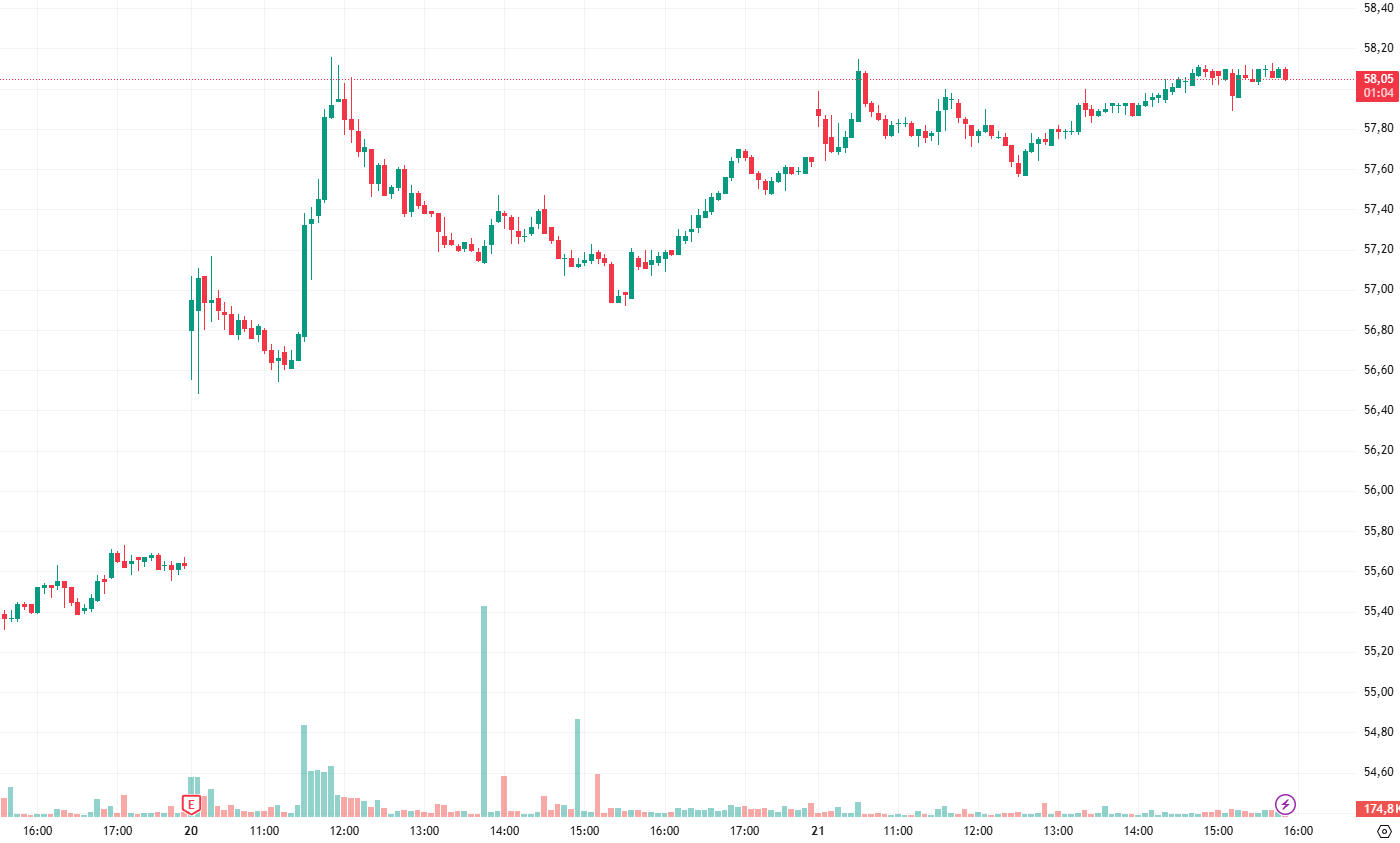

Essa ação reflete um momento positivo e otimista da empresa com resultados melhores se comparados ao ano passado, provavelmente também indica um aumento da meta interna da empresa para arcar com os custos de distribuição de dividendos. Sendo assim, espera-se que o 1T25 e 2T25 sejam fortes. 

3. Análise de Dados Básica 

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

Essa análise vai utilizar dados do Yahoo Finance que são puxados pela biblioteca yfinance. 
Baixamos um dataset que contém dados históricos sobre a abertura, máxima, mínima, fechamento, fechamento ajustado e volume da VALE3. 

Depois, testamos utilizando o df.head para verificar se o código encontrou os valores de um período específico corretamente, nesse caso, os primeiros 50 dias de 2023.

Obs: em alguns casos, o fechamento ajustado não aparece, falei para o código considerar que ele é igual ao fechamento normal caso ele não seja aplicável. 

In [2]:
def fetch_data_vale3(start_date, end_date):
    ticker = "VALE3.SA"  
    df = yf.download(ticker, start=start_date, end=end_date)
    if 'Adj Close' not in df.columns:
        df['Adj Close'] = df['Close']  
    return df

In [3]:
df = fetch_data_vale3("2023-01-01", "2024-01-01")
df.head(50)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VALE3.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA
Date,,,,,,


Agora, faremos a análise do retorno diário, da média móvel e da volatilidade da ação, adicionando eles no nosso dataset a partir daqui. 

In [13]:
df['Daily Return'] = df['Adj Close'].pct_change()
all_days = len(df)
df['Moving Average'] = df['Adj Close'].rolling(window=all_days, min_periods=1).mean()
df['Volatility'] = df['Daily Return'].rolling(window=all_days).std()

ValueError: attempt to get argmax of an empty sequence

In [5]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA
Date,,,,,,


In [6]:
print(df[['Adj Close', 'Moving Average']].head(60)) 

KeyError: "['Moving Average'] not in index"

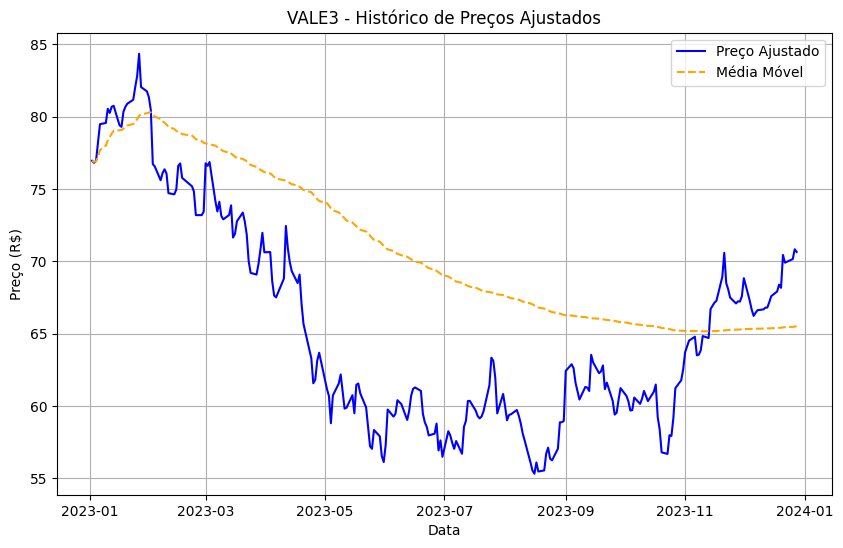

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'], label='Preço Ajustado', color='blue')
plt.plot(df['Moving Average'], label='Média Móvel', linestyle='--', color='orange')
plt.title('VALE3 - Histórico de Preços Ajustados')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid()
plt.show()

Obs: Os Retornos Diários são calculados de acordo com a seguinte fórmula:

Retorno Diário = (Preço Ajustado de Hoje - Preço Ajustado de Ontem) / Preço Ajustado de Ontem

In [ ]:
fig = px.line(
    df,  
    y='Daily Return',
    title='VALE3 - Retornos Diários',  
    template='plotly_dark'
    )

fig.update_layout(
    yaxis_tickformat=".2%" 
)

fig.show()

Fazendo as mesmas análises para atualmente, considerando um período do início de 2024 até o dia de hoje. 

In [5]:
from datetime import datetime
now = datetime.now() 
time = now.strftime("%Y-%m-%d")
print(time)

2025-02-21


Sempre que a célula acima for rodada, o programa abaixo fará as análises até o dia atual. 

In [6]:
df2 = fetch_data_vale3("2024-01-01", time)
df2.tail(50)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VALE3.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA
Date,,,,,,


In [ ]:
df2['Daily Return'] = df2['Adj Close'].pct_change()
all_days = len(df)
df2['Moving Average'] = df2['Adj Close'].rolling(window=all_days, min_periods=1).mean()
df2['Volatility'] = df2['Daily Return'].rolling(window=all_days).std()

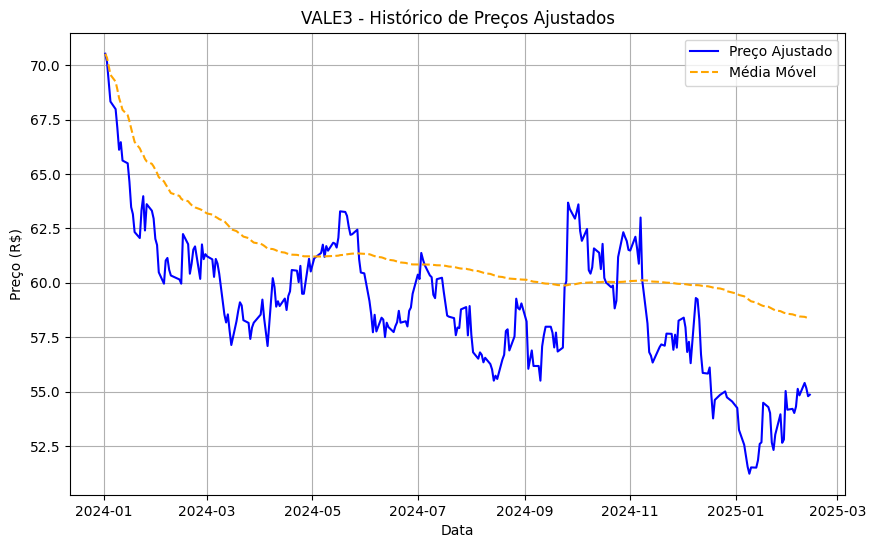

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df2['Adj Close'], label='Preço Ajustado', color='blue')
plt.plot(df2['Moving Average'], label='Média Móvel', linestyle='--', color='orange')
plt.title('VALE3 - Histórico de Preços Ajustados')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid()
plt.show()

fig = px.line(
    df2, 
    y='Daily Return',
    title='VALE3 - Retornos Diários',  
    template='plotly_dark'
    )

fig.update_layout(
    yaxis_tickformat=".2%" 
)

fig.show()

Aqui, vamos puxar o DFC (Fluxo de Caixa Descontado) da VALE3. A ideia é encontrar os valores da Taxa Interna de Retorno e do Valor Presente Líquido. 

Depois, vou calcular ele na mão apenas por fins de prática.

In [ ]:
from yahooquery import Ticker
ticker = "VALE3.SA" 
stock = Ticker(ticker)
dcf_data = stock.valuation_measures
print(dcf_data)

           asOfDate periodType  EnterpriseValue  EnterprisesValueEBITDARatio  \
symbol                                                                         
VALE3.SA 2023-09-30         3M     3.483763e+11                      4.03360   
VALE3.SA 2023-12-31         3M     3.921964e+11                      5.39800   
VALE3.SA 2024-03-31         3M     3.262822e+11                      4.31040   
VALE3.SA 2024-04-02        TTM              NaN                          NaN   
VALE3.SA 2024-04-04        TTM              NaN                     21.63143   
VALE3.SA 2024-06-10        TTM     3.330925e+11                      4.04390   
VALE3.SA 2024-06-30         3M     3.380351e+11                      4.97420   
VALE3.SA 2024-07-12        TTM     3.401933e+11                      5.06350   
VALE3.SA 2024-09-19        TTM     3.089141e+11                      3.63600   
VALE3.SA 2024-09-30         3M     3.311477e+11                      3.91760   
VALE3.SA 2025-02-18        TTM     3.061

Aqui vemos os seguintes valores:
- EV: R$ 303.059.500.000 
- EV/EBITDA: 3,4666 (Quantos anos de EBITDA seriam necessários para "pagar" o valor da empresa)
- Market Cap: R$ 248.586.100.000 

Ou seja: 
O valor de mercado da Vale teve algumas oscilações, mas sem mudanças drásticas.
O EV/EBITDA está em níveis relativamente baixos, o que pode indicar que a empresa está subvalorizada ou que os investidores estão cautelosos com o setor (o que faz total sentido se considerarmos o cenário macro já analisado).
O P/L projetado (Forward P/E) está na faixa 4,6 - 6,8, o que sugere que o mercado espera lucros sólidos, mas sem crescimento explosivo.

Calculamos os valores de FCFF abaixo da mesma forma.

In [22]:
cash_flow = stock.cash_flow()
print(cash_flow)

           asOfDate periodType currencyCode  AssetImpairmentCharge  \
symbol                                                               
VALE3.SA 2020-12-31        12M          USD           1.308000e+09   
VALE3.SA 2021-12-31        12M          USD           4.260000e+08   
VALE3.SA 2022-12-31        12M          USD          -7.730000e+08   
VALE3.SA 2023-12-31        12M          USD           2.660000e+08   
VALE3.SA 2024-09-30        TTM          USD          -2.027000e+09   

          BeginningCashPosition  CapitalExpenditure  \
symbol                                                
VALE3.SA           7.350000e+09       -4.227000e+09   
VALE3.SA           1.348700e+10       -5.033000e+09   
VALE3.SA           1.172100e+10       -5.446000e+09   
VALE3.SA           4.736000e+09       -5.920000e+09   
VALE3.SA           3.967000e+09       -6.239000e+09   

          CapitalExpenditureReported  CashDividendsPaid  \
symbol                                                    
VALE3

Aqui vemos os seguintes valores: 
- CAPEX (2024): -R$ 6.24 bi 
- Distribuição de didivendos (2024): -R$ 5,95 bi

Ou seja:
A empresa aumentou seus investimentos de $4,2 bi (2020) para $6,2 bi (expansão).
Em 2021, a VALE3 distribuiu $13,48 bi, um dos maiores valores registrados.
Atualmente (2024-TTM), reduziu para $5,95 bi.  